In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
from fastai.vision import *
#from torch.utils.data import SequentialSampler
#from fastai3D import mysampler
#from fastai3D import loader 

In [3]:
path = Path('/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train')
path.ls()

FileNotFoundError: [Errno 2] No such file or directory: '/home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train'

In [ ]:
path_img = path/'Images' #should later be provided through ini file
path_lbl = path/'Labels' #should later be provided through ini file

In [ ]:
img_names=get_image_files(path_img)
img_names[:3]

In [ ]:
lbl_names=get_image_files(path_lbl)
lbl_names[:3]

In [ ]:
def get_mask(img):
    return (path_lbl)/img.name

In [ ]:
#def get_mask(x):
#    return PosixPath(str(x)
#            .replace('train','NewLabels')
#            .replace('valid','NewLabels'))
            #.replace('resampled', 'labels'))

In [ ]:
mask = open_mask(get_mask(img_names[0]))
mask.show()

In [ ]:
img = open_image(img_names[0])
img.show()

In [ ]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

In [ ]:
src = (SegmentationItemList.from_folder(path)
       #.split_subsets(train_size=0.2, valid_size=0.1)
       .split_by_fname_file('valid.txt')
       .label_from_func(get_mask, classes=list(range(4))))

In [ ]:
data = (src.transform(get_transforms(), tfm_y=True, size=128)
       .databunch(bs=3)
       .normalize())
#data.show_batch(4, figsize=(10,7))
data.batch_size

In [14]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Valid: LabelList (762 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Test: None

In [15]:
#data.train_dl = data.train_dl.new(shuffle=False, drop_last=False, sampler=None, batch_sampler=mysampler.OrderedBatchSampler(SequentialSampler(data.train_dl), 3, False))

In [16]:
data

ImageDataBunch;

Train: LabelList (2000 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Valid: LabelList (762 items)
x: SegmentationItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: SegmentationLabelList
ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128),ImageSegment (1, 128, 128)
Path: /home/suze/Documents/Thesis/seed_images/Data_for_ML_Test/train;

Test: None

In [17]:
#data
data.batch_size

1

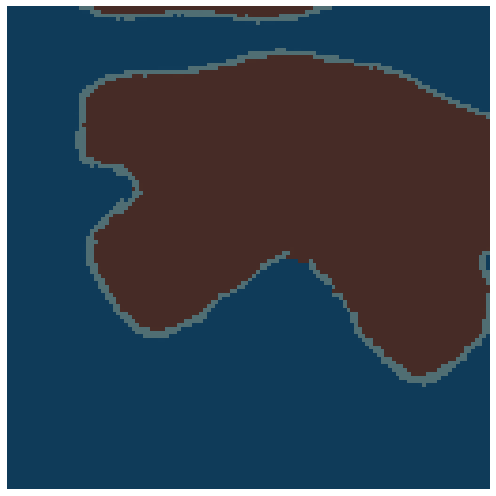

In [18]:
data.show_batch(4, figsize=(10,7))

In [19]:
#from Nikos

def acc_seeds(input, target):
    target = target.squeeze(1)
    mask = target != 0
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [20]:
metrics=acc_seeds
wd=1e-2

In [21]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


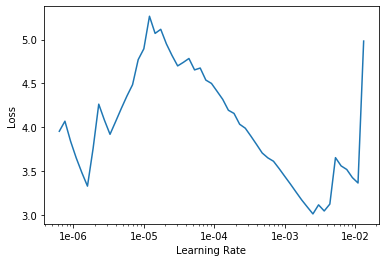

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(cyc_len=1, max_lr=1e-4)

epoch,train_loss,valid_loss,acc_seeds,time
0,0.021910,0.136686,nan,21:12


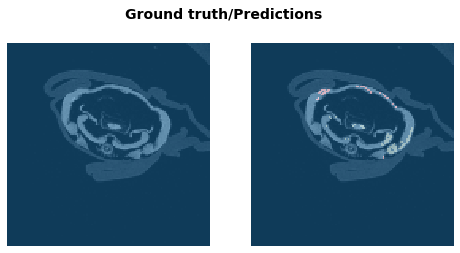

In [24]:
learn.show_results()

In [25]:
#learn.freeze()

In [26]:
#learn.save('stage-1')

In [27]:
#learn.load('stage-1');

In [28]:
#learn.unfreeze()

In [29]:
#lrs = slice(1e-4/100, 1e-4)

In [30]:
#learn.fit_one_cycle(4, lrs)